# Machine learning in Python #

## The data set ##

In [1]:
from sklearn.datasets import load_digits
data_set = load_digits()

Let's poke around and see what is in the data set.

In [2]:
data_set.keys()

dict_keys(['images', 'target_names', 'target', 'DESCR', 'data'])

In [3]:
data_set.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

Well, that is a bit hard to grok. Let's see if we can get a better view.

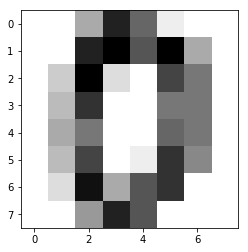

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4.0, 4.0)

def show_image(image_data):
    plt.imshow(image_data, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()
    
show_image(data_set.images[0])
data_set.images[0]

Now we have an idea of what our data looks like. It looks like they took 8x8 gray scale images, and then just concatenated all of the rows together.

In [5]:
data_set.target

array([0, 1, 2, ..., 8, 9, 8])

And each one of these data points has a label, 0 through 9.

## Machine learning time ##

In [6]:
half_length = len(data_set.data) // 2
train_set = {
    'data': data_set.data[:half_length],
    'target': data_set.target[:half_length],
}
test_set = {
    'data': data_set.data[half_length:],
    'target': data_set.target[half_length:]
}

In [7]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(train_set['data'], train_set['target'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

We now have a classifier. Let's try it out.

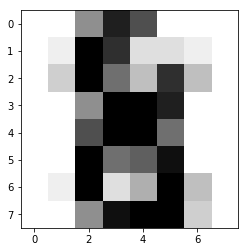

We predict: 8


In [15]:
import random
plt.rcParams['figure.figsize'] = (4.0, 4.0)
predictions = classifier.predict(test_set['data'])
the_pick = random.randrange(0, len(test_set['data']))
show_image(test_set['data'][the_pick].reshape(8, 8))
print("We predict: {0}".format(predictions[the_pick]))

In [16]:
import pandas as pd

pd.crosstab(test_set['target'], predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,86,0,0,0,1,0,1,0,0,0,88
1,0,77,4,3,0,0,0,0,1,6,91
2,1,0,78,6,0,0,0,0,0,1,86
3,0,3,1,79,0,1,1,3,2,1,91
4,7,0,0,0,80,1,2,0,0,2,92
5,0,1,0,0,0,84,4,0,0,2,91
6,0,0,1,0,0,0,90,0,0,0,91
7,0,0,1,0,2,1,0,83,1,1,89
8,0,9,11,7,0,5,0,0,56,0,88


 ## How are we doing? ##

In [17]:
from sklearn import metrics

print("Classification report")
print(metrics.classification_report(test_set['target'], predictions))

Classification report
             precision    recall  f1-score   support

          0       0.91      0.98      0.95        88
          1       0.85      0.85      0.85        91
          2       0.80      0.91      0.85        86
          3       0.81      0.87      0.84        91
          4       0.96      0.87      0.91        92
          5       0.87      0.92      0.89        91
          6       0.92      0.99      0.95        91
          7       0.94      0.93      0.94        89
          8       0.90      0.64      0.75        88
          9       0.86      0.85      0.85        92

avg / total       0.88      0.88      0.88       899



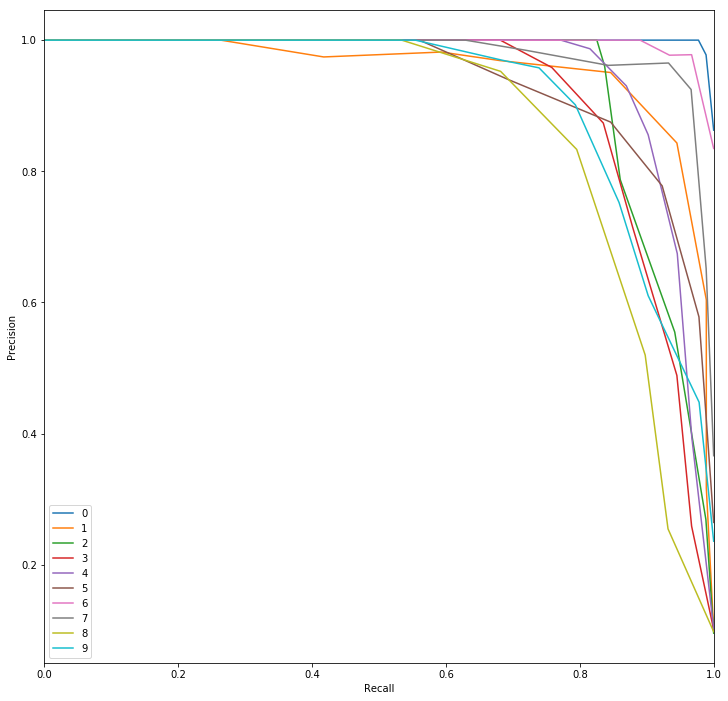

In [77]:
plt.rcParams['figure.figsize'] = (12.0, 12.0)
precision = []
recall = []
probabilities = classifier.predict_proba(test_set['data'])
for i in range(10):
    actual = [v == i for v in test_set['target']]
    p, r, _ = metrics.precision_recall_curve(actual, probabilities[:, i])
    precision.append(p)
    recall.append(r)

for i in range(10):
    plt.plot(recall[i], precision[i], label=i)
plt.legend(loc='lower left')
plt.xlim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Bad classifier #

In [18]:
import numpy as np

# Totally random data, nothing can be learned here.
rows = 1000
features = 64
data = np.random.random((rows, features))
labels = np.random.randint(0, 2, rows)

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Train it on all the data, such a bad idea!
bad_classifier = RandomForestClassifier()
bad_classifier.fit(data, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

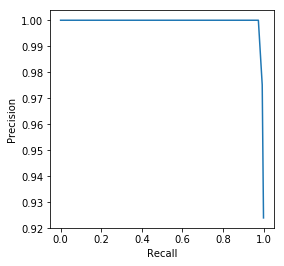

In [20]:
probabilities = bad_classifier.predict_proba(data)
p, r, _ = metrics.precision_recall_curve(labels, probabilities[:,1])
plt.plot(r, p)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## The right way to do it ##

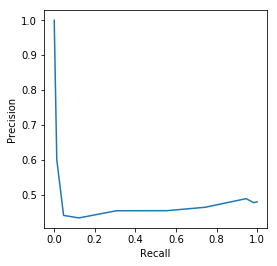

In [21]:
# Divide our data in half
half_length = len(data) // 2
train_data = data[:half_length]
train_labels = labels[:half_length]
test_data = data[half_length:]
test_labels = labels[half_length:]

# train on half of it
good_classifier = RandomForestClassifier()
good_classifier.fit(train_data, train_labels)

# evaluate
probabilities = good_classifier.predict_proba(test_data)
p, r, _ = metrics.precision_recall_curve(test_labels, probabilities[:,1])
plt.plot(r, p)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()